In [91]:
%cd D:\GitHub_Repository\Structural-Estimation\bisieco

D:\GitHub_Repository\Structural-Estimation\bisieco


c:\Users\Tsunc\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [92]:
#https://zenn.dev/s1ok69oo/articles/3b75bbfd12b6a2
#https://bashtage.github.io/linearmodels/iv/iv/linearmodels.iv.model.IV2SLS.html
#https://pypi.org/project/linearmodels/
#https://qiita.com/shinji_komine/items/b17ac71da1daf73125a4
###https://py4etrics.github.io/index.html

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import random
import warnings

pd.set_option('display.max_columns', None)
pd.options.display.min_rows = 115

In [93]:
data = pd.read_csv("data/raw/CleanData_20180222.csv", encoding="shift-jis")
data_hh = pd.read_csv("data/raw/HHsize.csv")
data_cpi = pd.read_csv("data/raw/zni2015s.csv", encoding="shift-jis")

In [94]:
df = data[['Maker','Type','Name','Year','Sales','Model','price','kata','weight','FuelEfficiency','HorsePower','overall_length','overall_width','overall_height']]
df = df.rename(columns={'Year': 'year'})
df = pd.merge(df, data_hh, on='year')

df["HH"]=df["HH"].str.replace(",","")

In [95]:
df["HH"]=df["HH"].str.replace(",","")

In [96]:
data_cpi.drop(index=data_cpi.index[0:5], inplace=True)
data_cpi.rename(columns={'類・品目': 'year', '総合': 'cpi'}, inplace=True)
data_cpi['year'] = data_cpi['year'].astype('int')
data_cpi['cpi'] = data_cpi['cpi'].astype('float')

In [97]:
df = pd.merge(df, data_cpi, on='year')

In [98]:
#df['FuelEfficiency'] = df['FuelEfficiency'].fillna(0)
df = df.dropna(how='any', axis=0)

In [99]:
display(df.head())

,Maker,Type,Name,year,Sales,Model,price,kata,weight,FuelEfficiency,HorsePower,overall_length,overall_width,overall_height,HH,cpi,生鮮食品を除く総合,持家の帰属家賃を除く総合,持家の帰属家賃及び生鮮食品を除く総合,食料（酒類を除く）及びエネルギーを除く総合,食料,生鮮食品,生鮮食品を除く食料,穀類,魚介類,生鮮魚介（再掲）,肉類,乳卵類,野菜・海藻,生鮮野菜（再掲）,果物,生鮮果物（再掲）,油脂・調味料,菓子類,調理食品,飲料,酒類,外食,住居,持家の帰属家賃を除く住居,家賃,持家の帰属家賃を除く家賃,設備修繕・維持,光熱・水道,電気代,ガス代,他の光熱,上下水道料,家具・家事用品,家庭用耐久財,室内装備品,寝具類,家事雑貨,家事用消耗品,家事サービス,被服及び履物,衣料,和服,洋服,シャツ・セーター・下着類,シャツ・セーター類,下着類,履物類,他の被服,被服関連サービス,保健医療,医薬品・健康保持用摂取品,保健医療用品・器具,保健医療サービス,交通・通信,交通,自動車等関係費,通信,教育,授業料等,教科書・学習参考教材,補習教育,教養娯楽,教養娯楽用耐久財,教養娯楽用品,書籍・他の印刷物,教養娯楽サービス,諸雑費,理美容サービス,理美容用品,身の回り用品,たばこ,他の諸雑費,エネルギー,教育関係費,教養娯楽関係費,情報通信関係費,生鮮食品及びエネルギーを除く総合
0,Audi,Foreign,A1シリーズ,2011,4206,1.4 TFSI,289.0,DBA-8XCAX,1190,19.4,122.0,3970,1740,1440,53783435,96.3,96.6,95.4,95.8,97.9,93.5,87.7,94.7,98.8,86.1,85.3,89.1,94.1,92.2,89.6,87.9,88.0,97.8,92.7,92.3,100.6,100.4,95.2,100.7,98.9,101.4,101.6,95.9,88.9,82.2,90.7,110.9,95.5,99.9,110.0,101.7,92.7,92.3,97.4,98.7,95.4,95.9,97.3,95.8,94.4,94.9,93.2,95.0,98.1,94.9,99.5,100.3,101.9,98.2,97.7,92.7,98.0,99.9,95.7,96.3,91.4,95.0,97.1,105.7,94.4,95.8,96.8,94.6,97.5,97.2,85.5,95.9,94.0,92.1,95.7,97.1,100.3,97.1
1,Audi,Foreign,A1シリーズ,2012,4502,1.4 TFSI,273.0,DBA-8XCAX,1190,19.4,122.0,3970,1740,1440,54171475,96.2,96.6,95.4,95.8,97.4,93.6,88.2,94.7,101.7,87.0,85.9,88.3,92.1,91.7,89.0,90.3,90.3,96.5,92.1,93.0,99.5,99.2,95.2,100.4,98.7,101.0,101.1,95.9,92.3,87.0,94.4,113.0,95.8,97.0,100.4,100.1,94.4,93.8,95.6,98.6,95.4,95.8,97.9,95.7,94.6,95.5,92.7,94.5,97.8,95.0,98.7,98.1,100.6,98.4,98.0,92.9,98.9,98.9,96.1,96.6,93.1,95.1,95.6,96.2,93.4,96.3,96.0,94.4,97.4,96.1,85.6,95.9,94.1,95.6,96.1,95.7,99.6,96.7
2,Audi,Foreign,A1シリーズ,2013,5071,1.4 TFSI,273.0,DBA-8XCAX,1190,19.4,122.0,3970,1740,1440,54594744,96.6,96.9,95.8,96.3,97.2,93.4,88.2,94.5,101.2,87.9,86.3,88.5,92.1,91.7,89.3,88.8,88.8,95.9,92.3,92.7,98.0,98.1,95.5,99.9,98.3,100.6,100.7,95.7,96.6,93.2,96.9,122.0,96.3,94.9,93.5,98.2,94.3,94.5,95.2,98.3,95.8,96.3,97.8,96.3,95.2,96.2,93.2,94.2,97.0,95.4,98.1,97.1,98.7,98.5,99.4,92.9,101.5,98.4,96.6,96.9,96.4,95.9,94.6,91.2,93.0,96.5,95.4,95.5,97.4,96.4,89.8,95.9,95.7,101.1,96.5,94.8,98.7,96.5
3,Audi,Foreign,A3シリーズ,2006,4830,アトラクション,284.0,GH-8PBSE,1360,12.2,102.0,4285,1765,1430,51102005,97.2,97.7,96.2,96.8,101.1,91.3,85.7,92.4,97.2,85.4,85.5,86.7,89.6,88.8,85.3,86.0,85.9,96.0,86.3,88.9,107.2,103.1,92.1,101.5,99.2,102.6,103.1,95.0,84.2,79.7,82.6,93.7,94.2,115.6,165.5,116.8,98.8,91.0,101.0,98.2,96.7,97.5,97.8,97.6,95.7,95.4,96.4,94.3,103.6,91.1,100.7,107.6,110.0,94.6,98.4,92.3,97.6,104.0,105.8,111.4,83.4,93.3,107.4,344.1,100.3,94.7,95.9,89.3,98.3,101.3,83.6,66.4,86.8,86.0,103.0,106.3,102.6,98.8
4,Audi,Foreign,A3シリーズ,2007,3874,アトラクション,286.0,GH-8PBSE,1360,12.2,102.0,4285,1765,1430,51713048,97.2,97.7,96.3,96.9,100.8,91.6,86.2,92.7,96.7,86.2,86.5,88.3,89.3,87.5,83.2,90.2,90.3,96.5,86.6,89.4,106.1,101.9,92.8,101.3,99.2,102.4,102.9,95.1,84.8,80.0,83.9,95.1,94.2,113.7,155.4,114.3,98.5,91.9,102.4,98.5,97.2,97.9,97.5,98.0,96.3,96.4,96.0,95.6,103.2,92.0,101.0,106.5,109.5,95.7,98.5,92.4,98.6,101.8,106.5,112.2,84.6,94.2,106.0,286.6,99.1,94.8,96.8,90.0,98.0,101.2,85.3,69.3,87.2,87.5,103.8,105.1,101.0,98.7


In [100]:
display(df.isnull().sum())
l = []
for index, value in df.isnull().sum().items():
    if value > 0:
        l.append(index)
l

Maker                    0
Type                     0
Name                     0
year                     0
Sales                    0
Model                    0
price                    0
kata                     0
weight                   0
FuelEfficiency           0
HorsePower               0
overall_length           0
overall_width            0
overall_height           0
HH                       0
cpi                      0
生鮮食品を除く総合                0
持家の帰属家賃を除く総合             0
持家の帰属家賃及び生鮮食品を除く総合       0
食料（酒類を除く）及びエネルギーを除く総合    0
食料                       0
生鮮食品                     0
生鮮食品を除く食料                0
穀類                       0
魚介類                      0
生鮮魚介（再掲）                 0
肉類                       0
乳卵類                      0
野菜・海藻                    0
生鮮野菜（再掲）                 0
                        ..
他の被服                     0
被服関連サービス                 0
保健医療                     0
医薬品・健康保持用摂取品             0
保健医療用品・器具                0
保健医療サービス                 0
交

[]

In [101]:
cpi2016 = data_cpi[data_cpi['year']==2016]
cpi2016 = float(cpi2016.values[0][1])

In [102]:
print(df.dtypes)

Maker                     object
Type                      object
Name                      object
year                       int64
Sales                      int64
Model                     object
price                    float64
kata                      object
weight                     int64
FuelEfficiency           float64
HorsePower               float64
overall_length             int64
overall_width              int64
overall_height             int64
HH                        object
cpi                      float64
生鮮食品を除く総合                 object
持家の帰属家賃を除く総合              object
持家の帰属家賃及び生鮮食品を除く総合        object
食料（酒類を除く）及びエネルギーを除く総合     object
食料                        object
生鮮食品                      object
生鮮食品を除く食料                 object
穀類                        object
魚介類                       object
生鮮魚介（再掲）                  object
肉類                        object
乳卵類                       object
野菜・海藻                     object
生鮮野菜（再掲）                  object
          

In [103]:
df['HH'] = df['HH'].astype('int')
df['price'] = (df['price'] / (df['cpi'] / cpi2016)) / 100
df['size'] = (df['overall_height'] / 1000) * (df['overall_length'] / 1000) * (df['overall_width'] / 1000)
df['hppw'] = df['HorsePower'] / df['weight']
df['car_id'] = le.fit_transform(df['Name'])
df['inside_total'] = df[['year','Sales']].groupby('year').transform('sum')
df['outside_total'] = df['HH'] - df['inside_total']
df['share'] = df['Sales'] / df['HH']
df['share0'] = df['outside_total'] / df['HH']

In [104]:
attribute_cols = ['hppw', 'FuelEfficiency', 'size']

for i in attribute_cols:
    df[f"sum_own_{i}"] = df[['year', 'Maker', i]].groupby(['year','Maker']).transform('sum')[i]
    df[f"sqr_{i}"] = df[i] ** 2
    col_name = "sqr_" + i
    df[f"sqr_sum_own_{i}"] = df[['year', 'Maker', col_name]].groupby(['year','Maker']).transform('sum')[col_name]
for i in attribute_cols:
    df[f"sum_market_{i}"] = df[['year', i]].groupby(['year']).transform('sum')[i]
    col_name = "sqr_" + i
    df[f"sqr_sum_market_{i}"] = df[['year', col_name]].groupby(['year']).transform('sum')[col_name]

In [105]:
maker_n = df[['year', 'Maker']].groupby(['year','Maker']).transform('size')
market_n = df[['year']].groupby(['year']).transform('size')

In [106]:
for i in attribute_cols:
    df[f"iv_BLP_own_{i}"] = df[f"sum_own_{i}"] - df[i]
    df[f"iv_BLP_other_{i}"] = df[f"sum_market_{i}"] - df[i]

for i in attribute_cols:
    df[f"iv_GH_own_{i}"] = (maker_n - 1) * df[f"sqr_{i}"] + (df[f"sqr_sum_own_{i}"] - df[f"sqr_{i}"]) - 2 * df[i] * (df[f"sum_own_{i}"] - df[i])
    df[f"iv_GH_other_{i}"] = (market_n - maker_n) * df[f"sqr_{i}"] + (df[f"sqr_sum_market_{i}"] - df[f"sqr_sum_own_{i}"]) - 2 * df[i] * (df[f"sum_market_{i}"] - df[f"sum_own_{i}"])

In [107]:
id_list = np.sort(df['car_id'].unique()).tolist()
J = len(id_list)

In [108]:
random_state = 42

random.seed(random_state)
nippyo_id = np.sort(random.sample(id_list, 30))

In [109]:
df_nippyo = df[['car_id', 'Sales', 'price', 'hppw','FuelEfficiency','size']][df['car_id'].isin(nippyo_id)]
df_nippyo['log_sales'] = np.log(df['Sales'])
df_nippyo['log_price'] = np.log(df['price'])

In [110]:
display(df_nippyo)

,car_id,Sales,price,hppw,FuelEfficiency,size,log_sales,log_price
40,6,22789,4.491389,0.097403,11.4,11.908669,10.034033,1.502162
41,6,23330,4.491389,0.101299,11.4,11.908669,10.057495,1.502162
42,6,17809,4.427617,0.101299,11.4,11.908669,9.787459,1.487861
43,6,14042,4.357778,0.101299,11.4,11.836350,9.549808,1.471962
44,6,11664,4.813834,0.109677,13.0,11.713905,9.364262,1.571494
45,6,8912,4.823832,0.109677,13.0,11.713905,9.095154,1.573569
46,6,11107,4.828846,0.109677,13.0,11.713905,9.315331,1.574608
47,6,18739,4.870901,0.115000,16.4,12.154500,9.838362,1.583279
48,6,15835,5.025212,0.115000,16.4,12.154500,9.669978,1.614468
49,6,12050,4.485510,0.110843,15.4,12.207060,9.396820,1.500852


In [111]:
import statsmodels.api as sm

#formula = "log_sales ~ log_price + hppw + FuelEfficiency + size"
X = df_nippyo[['log_price', 'hppw', 'FuelEfficiency', 'size']]
y = df_nippyo['log_sales']
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     9.599
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           3.98e-07
Time:                        12:15:27   Log-Likelihood:                -360.93
No. Observations:                 207   AIC:                             731.9
Df Residuals:                     202   BIC:                             748.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5312      1.075      4.

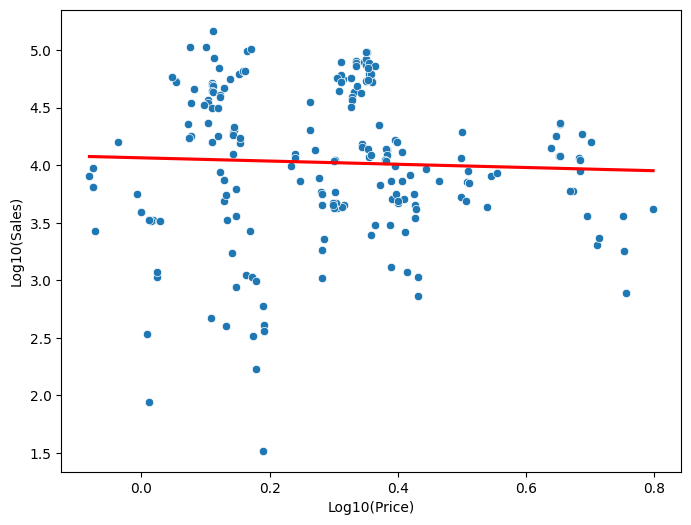

In [112]:
# Plot price-sales
data_graph = df_nippyo[['price', 'Sales']].copy()

# Apply log transformation
data_graph['log_price'] = np.log10(data_graph['price'])
data_graph['log_Sales'] = np.log10(data_graph['Sales'])

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='log_price', y='log_Sales', data=data_graph)
sns.regplot(x='log_price', y='log_Sales', data=data_graph, scatter=False, ci=None, line_kws={'color':'red'})

plt.xlabel("Log10(Price)")
plt.ylabel("Log10(Sales)")

plt.show()

In [113]:
# Descriptive statistics
df[['Sales','price','FuelEfficiency','size','hppw']].describe()

,Sales,price,FuelEfficiency,size,hppw
count,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000
mean,24586.387274,2.530471,16.159737,11.505309,0.099131
std,40195.267189,1.827153,5.550633,2.481950,0.035582
min,10.000000,0.705176,5.500000,5.908998,0.045000
25%,2975.000000,1.416500,12.000000,9.585893,0.076699
50%,8544.000000,2.050417,15.400000,11.472523,0.092683
75%,27323.500000,2.868792,19.400000,13.043144,0.106452
max,317675.000000,12.626474,40.800000,19.154817,0.323864


In [114]:
#Logit Model
df['logit_share'] = np.log(df['share']) - np.log(df['share0'])

#fromula logit_share ~ price + hppw + FuelEfficiency + size
X = df[['price','hppw','FuelEfficiency','size']]
y = df['logit_share']
ols = sm.OLS(y, sm.add_constant(X)).fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            logit_share   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     129.7
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           1.67e-97
Time:                        12:15:27   Log-Likelihood:                -3401.3
No. Observations:                1823   AIC:                             6813.
Df Residuals:                    1818   BIC:                             6840.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.2548      0.375    -32.

In [ ]:
#2SLS
from linearmodels.iv import IV2SLS

blp = IV2SLS.from_formula("logit_share ~ 1 + hppw + FuelEfficiency + size + \
                [price ~ iv_BLP_own_hppw + iv_BLP_own_FuelEfficiency + iv_BLP_own_size + iv_BLP_other_hppw + iv_BLP_other_FuelEfficiency + iv_BLP_other_size]", df).fit()

dif = IV2SLS.from_formula("logit_share ~ 1 + hppw + FuelEfficiency + size + \
                [price ~ iv_GH_own_hppw + iv_GH_own_FuelEfficiency + iv_GH_own_size + iv_GH_other_hppw + iv_GH_other_FuelEfficiency + iv_GH_other_size]", df).fit()

In [ ]:
print('2SLS: BLP IV')
display(blp.summary)
print('-'*60)
print('2SLS: GH IV')
display(dif.summary)

2SLS: BLP IV


<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:            logit_share   R-squared:                      0.2216
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2199
No. Observations:                1823   F-statistic:                    482.81
Date:                Thu, Apr 03 2025   P-value (F-stat)                0.0000
Time:                        12:15:27   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
==================================================================================
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -12.323     0.3815    -32.304     0.0000     -13.071     -11.576
hppw               0.2129     2.2943     0.0928     0.9261     -4.2839      4.7098
FuelEfficiency     0.1298     0.0097     13.328     0.0000      0.1107      0.1489
size               0.1874     0.0211     8.8598     0.0000      0.1459      0.2288
price             -0.2835     0.0669    -4.2352     0.0000     -0.4147     -0.1523
==================================================================================

Endogenous: price
Instruments: iv_BLP_own_hppw, iv_BLP_own_FuelEfficiency, iv_BLP_own_size, iv_BLP_other_hppw, iv_BLP_other_FuelEfficiency, iv_BLP_other_size
Robust Covariance (Heteroskedastic)
Debiased: False
"""

------------------------------------------------------------
2SLS: Differentiation IV


<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:            logit_share   R-squared:                      0.1805
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1787
No. Observations:                1823   F-statistic:                    459.59
Date:                Thu, Apr 03 2025   P-value (F-stat)                0.0000
Time:                        12:15:27   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
==================================================================================
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -12.973     0.3921    -33.084     0.0000     -13.741     -12.204
hppw               8.4256     2.6339     3.1989     0.0014      3.2632      13.588
FuelEfficiency     0.1268     0.0096     13.159     0.0000      0.1079      0.1457
size               0.2363     0.0222     10.660     0.0000      0.1929      0.2798
price             -0.5521     0.0804    -6.8708     0.0000     -0.7096     -0.3946
==================================================================================

Endogenous: price
Instruments: iv_GH_own_hppw, iv_GH_own_FuelEfficiency, iv_GH_own_size, iv_GH_other_hppw, iv_GH_other_FuelEfficiency, iv_GH_other_size
Robust Covariance (Heteroskedastic)
Debiased: False
"""

In [135]:
# First Stage
import statsmodels.formula.api as smf

iv1st_BLP = smf.ols("price ~ hppw + FuelEfficiency + size + iv_BLP_own_hppw + iv_BLP_own_FuelEfficiency + iv_BLP_own_size + iv_BLP_other_hppw + iv_BLP_other_FuelEfficiency + iv_BLP_other_size", data=df).fit(cov_type='HC3')

iv1st_GH = smf.ols("price ~ hppw + FuelEfficiency + size + iv_GH_own_hppw + iv_GH_own_FuelEfficiency + iv_GH_own_size + iv_GH_other_hppw + iv_GH_other_FuelEfficiency + iv_GH_other_size", data=df).fit(cov_type='HC3')

# Display results
print('1st Stage: BLP IV')
display(iv1st_BLP.summary())
print('-'*80)
print('1st Stage: GH IV')
display(iv1st_GH.summary())

1st Stage: BLP IV


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     191.4
Date:                Thu, 03 Apr 2025   Prob (F-statistic):          1.79e-255
Time:                        12:22:35   Log-Likelihood:                -2813.7
No. Observations:                1823   AIC:                             5647.
Df Residuals:                    1813   BIC:                             5703.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.1591      1.690     -1.869      0.062      -6.472       0.154
hppw                           28.7486      0.999     28.771      0.000      26.790      30.707
FuelEfficiency                 -0.0110      0.008     -1.367      0.172      -0.027       0.005
size                            0.2020      0.015     13.423      0.000       0.173       0.232
iv_BLP_own_hppw                -0.8929      0.250     -3.565      0.000      -1.384      -0.402
iv_BLP_own_FuelEfficiency      -0.0087      0.001    -12.150      0.000      -0.010      -0.007
iv_BLP_own_size                 0.0155      0.002      6.526      0.000       0.011       0.020
iv_BLP_other_hppw               0.1652      0.256      0.645      0.519      -0.337       0.667
iv_BLP_other_FuelEfficiency     0.0012      0.000      3.170      0.002       0.000       0.002
iv_BLP_other_size              -0.0023      0.003     -0.729      0.466      -0.008       0.004
==============================================================================
Omnibus:                     1387.795   Durbin-Watson:                   0.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34669.926
Skew:                           3.355   Prob(JB):                         0.00
Kurtosis:                      23.283   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

--------------------------------------------------------------------------------
1st Stage: GH IV


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     333.4
Date:                Thu, 03 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:22:35   Log-Likelihood:                -2795.0
No. Observations:                1823   AIC:                             5610.
Df Residuals:                    1813   BIC:                             5665.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.3251      0.426     -3.111      0.002      -2.160      -0.490
hppw                          23.5084      1.557     15.095      0.000      20.456      26.561
FuelEfficiency                -0.0717      0.015     -4.934      0.000      -0.100      -0.043
size                           0.1895      0.021      9.217      0.000       0.149       0.230
iv_GH_own_hppw                -1.8887      0.450     -4.200      0.000      -2.770      -1.007
iv_GH_own_FuelEfficiency    5.283e-05   3.28e-05      1.612      0.107   -1.14e-05       0.000
iv_GH_own_size                -0.0013      0.000     -6.405      0.000      -0.002      -0.001
iv_GH_other_hppw               0.4233      0.097      4.360      0.000       0.233       0.614
iv_GH_other_FuelEfficiency  4.882e-05   8.84e-06      5.525      0.000    3.15e-05    6.61e-05
iv_GH_other_size               0.0001   3.97e-05      3.750      0.000     7.1e-05       0.000
==============================================================================
Omnibus:                     1221.723   Durbin-Watson:                   0.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19752.774
Skew:                           2.938   Prob(JB):                         0.00
Kurtosis:                      18.017   Cond. No.                     6.17e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 6.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#self_elasticity
df['own_elas_ols'] = ols.params['price'] * df['price'] * (1 - df['share'])
df['own_elas_blp'] = blp.params['price'] * df['price'] * (1 - df['share'])
df['own_elas_dif'] = dif.params['price'] * df['price'] * (1 - df['share'])

In [118]:
display(df[['own_elas_ols', 'own_elas_blp', 'own_elas_dif']].describe())

,own_elas_ols,own_elas_blp,own_elas_dif
count,1823.000000,1823.000000,1823.000000
mean,-0.645328,-0.717085,-1.396703
std,0.466144,0.517977,1.008890
min,-3.221041,-3.579205,-6.971399
25%,-0.731678,-0.813037,-1.583593
50%,-0.522324,-0.580404,-1.130483
75%,-0.361180,-0.401342,-0.781713
max,-0.179892,-0.199895,-0.389346


In [119]:
display(df[df['size']==17.09437])

,Maker,Type,Name,year,Sales,Model,price,kata,weight,FuelEfficiency,HorsePower,overall_length,overall_width,overall_height,HH,cpi,生鮮食品を除く総合,持家の帰属家賃を除く総合,持家の帰属家賃及び生鮮食品を除く総合,食料（酒類を除く）及びエネルギーを除く総合,食料,生鮮食品,生鮮食品を除く食料,穀類,魚介類,生鮮魚介（再掲）,肉類,乳卵類,野菜・海藻,生鮮野菜（再掲）,果物,生鮮果物（再掲）,油脂・調味料,菓子類,調理食品,飲料,酒類,外食,住居,持家の帰属家賃を除く住居,家賃,持家の帰属家賃を除く家賃,設備修繕・維持,光熱・水道,電気代,ガス代,他の光熱,上下水道料,家具・家事用品,家庭用耐久財,室内装備品,寝具類,家事雑貨,家事用消耗品,家事サービス,被服及び履物,衣料,和服,洋服,シャツ・セーター・下着類,シャツ・セーター類,下着類,履物類,他の被服,被服関連サービス,保健医療,医薬品・健康保持用摂取品,保健医療用品・器具,保健医療サービス,交通・通信,交通,自動車等関係費,通信,教育,授業料等,教科書・学習参考教材,補習教育,教養娯楽,教養娯楽用耐久財,教養娯楽用品,書籍・他の印刷物,教養娯楽サービス,諸雑費,理美容サービス,理美容用品,身の回り用品,たばこ,他の諸雑費,エネルギー,教育関係費,教養娯楽関係費,情報通信関係費,生鮮食品及びエネルギーを除く総合,size,hppw,car_id,inside_total,outside_total,share,share0,sum_own_hppw,sqr_hppw,sqr_sum_own_hppw,sum_own_FuelEfficiency,sqr_FuelEfficiency,sqr_sum_own_FuelEfficiency,sum_own_size,sqr_size,sqr_sum_own_size,sum_market_hppw,sqr_sum_market_hppw,sum_market_FuelEfficiency,sqr_sum_market_FuelEfficiency,sum_market_size,sqr_sum_market_size,iv_BLP_own_hppw,iv_BLP_other_hppw,iv_BLP_own_FuelEfficiency,iv_BLP_other_FuelEfficiency,iv_BLP_own_size,iv_BLP_other_size,iv_GH_own_hppw,iv_GH_other_hppw,iv_GH_own_FuelEfficiency,iv_GH_other_FuelEfficiency,iv_GH_own_size,iv_GH_other_size,logit_share,own_elas_ols,own_elas_blp,own_elas_dif
1500,Toyota,Regular,アルファード,2015,44366,2.5 X,3.194802,DBA-AGH30W,1920,11.6,182.0,4915,1850,1880,56412140,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,17.09437,0.094792,86,4066354,52345786,0.000786,0.927917,3.636999,0.008985,0.374121,643.4,134.56,12995.46,465.632121,292.217486,6127.680657,16.276325,1.833052,3019.4,62351.38,1924.677830,23541.060479,3.542207,16.181533,631.8,3007.8,448.537751,1907.583460,0.017068,0.212864,3047.30,11456.40,1020.352116,4934.283581,-7.073153,-0.814363,-0.904916,-1.762550
1501,Toyota,Regular,アルファード,2016,37069,2.5 X,3.198000,DBA-AGH30W,1920,11.6,182.0,4915,1850,1880,56950757,99.9,99.7,99.9,99.7,100.3,101.7,104.6,101.2,101.7,101.8,101.9,101.6,100.3,103.7,105.0,106.8,107.0,100.7,102.5,101.4,100.3,99.6,100.8,99.9,100.4,99.7,99.7,101.0,92.7,92.1,90.4,77.7,100.4,99.6,96.5,96.0,101.4,104.7,99.7,100.0,101.8,101.6,100.0,101.7,101.3,100.9,102.3,104.2,101.0,100.8,100.9,99.9,100.9,101.4,98.0,99.9,97.0,99.1,101.6,101.8,100.4,101.2,101.0,101.0,100.9,100.3,101.1,100.7,100.2,100.1,101.3,101.2,101.0,89.8,101.7,100.8,99.2,100.6,17.09437,0.094792,86,3983817,52966940,0.000651,0.930048,3.842385,0.008985,0.388206,721.0,134.56,15287.38,499.764264,292.217486,6520.212118,16.712820,1.905259,3176.1,67586.05,1974.399901,24147.538874,3.747593,16.618028,709.4,3164.5,482.669894,1957.305531,0.019172,0.236157,3942.58,12698.59,1122.601067,4907.448019,-7.264642,-0.815288,-0.905944,-1.764554


In [120]:
display(df[df.index==1501])

,Maker,Type,Name,year,Sales,Model,price,kata,weight,FuelEfficiency,HorsePower,overall_length,overall_width,overall_height,HH,cpi,生鮮食品を除く総合,持家の帰属家賃を除く総合,持家の帰属家賃及び生鮮食品を除く総合,食料（酒類を除く）及びエネルギーを除く総合,食料,生鮮食品,生鮮食品を除く食料,穀類,魚介類,生鮮魚介（再掲）,肉類,乳卵類,野菜・海藻,生鮮野菜（再掲）,果物,生鮮果物（再掲）,油脂・調味料,菓子類,調理食品,飲料,酒類,外食,住居,持家の帰属家賃を除く住居,家賃,持家の帰属家賃を除く家賃,設備修繕・維持,光熱・水道,電気代,ガス代,他の光熱,上下水道料,家具・家事用品,家庭用耐久財,室内装備品,寝具類,家事雑貨,家事用消耗品,家事サービス,被服及び履物,衣料,和服,洋服,シャツ・セーター・下着類,シャツ・セーター類,下着類,履物類,他の被服,被服関連サービス,保健医療,医薬品・健康保持用摂取品,保健医療用品・器具,保健医療サービス,交通・通信,交通,自動車等関係費,通信,教育,授業料等,教科書・学習参考教材,補習教育,教養娯楽,教養娯楽用耐久財,教養娯楽用品,書籍・他の印刷物,教養娯楽サービス,諸雑費,理美容サービス,理美容用品,身の回り用品,たばこ,他の諸雑費,エネルギー,教育関係費,教養娯楽関係費,情報通信関係費,生鮮食品及びエネルギーを除く総合,size,hppw,car_id,inside_total,outside_total,share,share0,sum_own_hppw,sqr_hppw,sqr_sum_own_hppw,sum_own_FuelEfficiency,sqr_FuelEfficiency,sqr_sum_own_FuelEfficiency,sum_own_size,sqr_size,sqr_sum_own_size,sum_market_hppw,sqr_sum_market_hppw,sum_market_FuelEfficiency,sqr_sum_market_FuelEfficiency,sum_market_size,sqr_sum_market_size,iv_BLP_own_hppw,iv_BLP_other_hppw,iv_BLP_own_FuelEfficiency,iv_BLP_other_FuelEfficiency,iv_BLP_own_size,iv_BLP_other_size,iv_GH_own_hppw,iv_GH_other_hppw,iv_GH_own_FuelEfficiency,iv_GH_other_FuelEfficiency,iv_GH_own_size,iv_GH_other_size,logit_share,own_elas_ols,own_elas_blp,own_elas_dif
1501,Toyota,Regular,アルファード,2016,37069,2.5 X,3.198,DBA-AGH30W,1920,11.6,182.0,4915,1850,1880,56950757,99.9,99.7,99.9,99.7,100.3,101.7,104.6,101.2,101.7,101.8,101.9,101.6,100.3,103.7,105.0,106.8,107.0,100.7,102.5,101.4,100.3,99.6,100.8,99.9,100.4,99.7,99.7,101.0,92.7,92.1,90.4,77.7,100.4,99.6,96.5,96.0,101.4,104.7,99.7,100.0,101.8,101.6,100.0,101.7,101.3,100.9,102.3,104.2,101.0,100.8,100.9,99.9,100.9,101.4,98.0,99.9,97.0,99.1,101.6,101.8,100.4,101.2,101.0,101.0,100.9,100.3,101.1,100.7,100.2,100.1,101.3,101.2,101.0,89.8,101.7,100.8,99.2,100.6,17.09437,0.094792,86,3983817,52966940,0.000651,0.930048,3.842385,0.008985,0.388206,721.0,134.56,15287.38,499.764264,292.217486,6520.212118,16.71282,1.905259,3176.1,67586.05,1974.399901,24147.538874,3.747593,16.618028,709.4,3164.5,482.669894,1957.305531,0.019172,0.236157,3942.58,12698.59,1122.601067,4907.448019,-7.264642,-0.815288,-0.905944,-1.764554


In [121]:
# Demand Curve
df['xi_fit'] = dif.resids

def f_share(price_cand, year, model_id_target, df, estparam):
    dt = df.copy()
    dt = dt[dt['year']==year]
    dt['temp_price'] = np.where(dt['car_id'] == model_id_target, price_cand, dt['price'])
    dt['delta'] = estparam['Intercept'] + estparam['price']*dt['temp_price'] + estparam['hppw']*dt['hppw'] + estparam['FuelEfficiency']*dt['FuelEfficiency'] + estparam['size']*dt['size'] + dt['xi_fit']
    dt['denom'] = 1 + sum(np.exp(dt['delta']))
    dt['pred_sales'] = np.exp(dt['delta'])/dt['denom']*dt['HH']
    dt = dt[dt['car_id']==model_id_target]
    return dt['pred_sales']

In [122]:
dif.params

Intercept        -12.972671
hppw               8.425585
FuelEfficiency     0.126836
size               0.236321
price             -0.552127
Name: parameter, dtype: float64

In [123]:
def frange(start, end , step):
    if step == 0:
        raise ValueError('step must not be zero')

    start = float(start)
    end = float(end)
    step = float(step)

    # range関数と同様な振る舞いにする
    if abs(step) > abs(start - end):
        return [start]
    if step > 0 and end - start < 0:
        return []
    elif step < 0 and end - start > 0:
        return []

    exp = len(str(step).split('.')[1])  # 丸める際に使用する桁数
    result = [start]
    val = start
    if step > 0:
        while (val := round(val + step, exp)) < end:
            result.append(val)
    else:
        while (val := round(val + step, exp)) > end:
            result.append(val)
    return result

for num in frange(0.0, 0.5, 0.1):
    print(num)

0.0
0.1
0.2
0.3
0.4


In [124]:
estparam = dif.params
name_id_target = 86

pricevec = [n for n in frange(0.3,5,0.05)]
quantvec = [0] * len(pricevec)
revenuevec = [0] * len(pricevec)

for i in range(len(pricevec)):
    quantvec[i] = f_share(price_cand=pricevec[i],year=2016,model_id_target=name_id_target, df=df, estparam=estparam)
    revenuevec[i] = pricevec[i] * quantvec[i]

pvec = [int(p*100) for p in pricevec]
revvec = [int(r.iloc[0]*100/10000) for r in revenuevec]

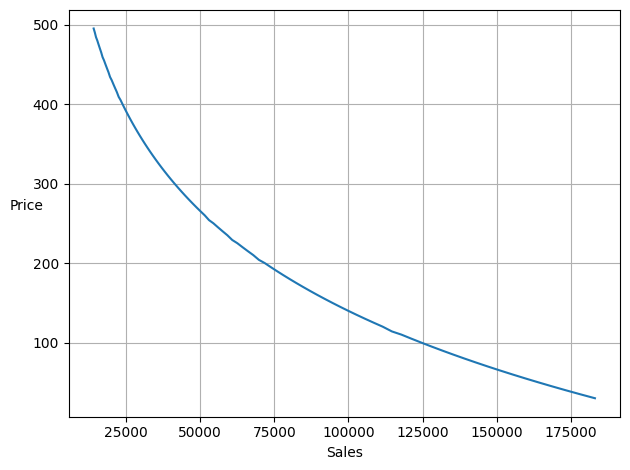

In [125]:
x = quantvec
y = pvec

# プロット
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x,y)

plt.xlabel('Sales')
plt.ylabel('Price', rotation=0)

plt.grid()
plt.tight_layout()
# プロット表示(設定の反映)
plt.show()

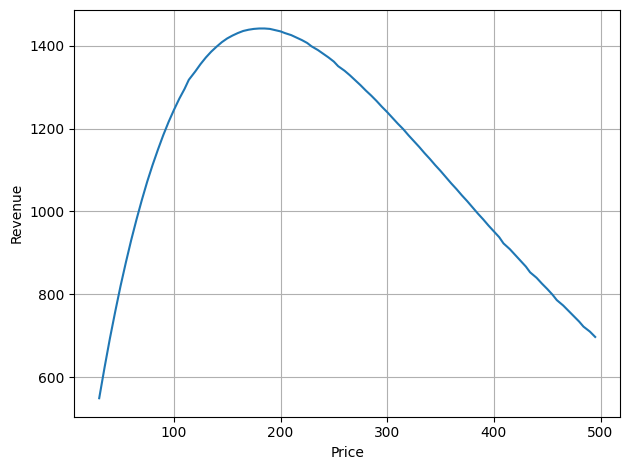

In [126]:
x = pvec
y = revvec

# プロット
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x,y)

plt.xlabel('Price')
plt.ylabel('Revenue', rotation=90)

plt.grid()
plt.tight_layout()
# プロット表示(設定の反映)
plt.show()

In [127]:
from scipy.optimize import minimize_scalar

def f_revenue(price_cand, year, model_id_target, df, estparam):
    quantity = f_share(price_cand, year, model_id_target, df, estparam).iloc[0]
    return price_cand * quantity

def neg_f_revenue(price_cand, year, model_id_target, df, estparam):
    return -f_revenue(price_cand, year, model_id_target, df, estparam)

res = minimize_scalar(neg_f_revenue, bounds=(0.3, 3), args=(2016, 86, df, estparam))

In [128]:
# 最適な価格と最大収益
optimal_price = res.x
max_revenue = -res.fun  # 符号を元に戻す

print(f"最適な価格: {optimal_price}")
print(f"最大収益: {max_revenue}")

最適な価格: 1.813708889509235
最大収益: 144273.83612997463
